In [60]:
import cv2
import numpy as np
import os
from sklearn.svm import LinearSVC
from sklearn.externals import joblib
from scipy.cluster.vq import *
import seaborn as sns

from sklearn.preprocessing import StandardScaler
import glob
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import pandas as pd
from skimage import data
from skimage.feature import hog

%matplotlib inline
#from helper import *
import helper
from sklearn.pipeline import FeatureUnion, Pipeline
from sklearn.cross_validation import StratifiedShuffleSplit
from functools import partial
import datetime
import pickle
import json

In [3]:
# sklearn models
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.svm import LinearSVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn import linear_model
from sklearn.naive_bayes import BernoulliNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.preprocessing import scale

# sklearn metrics
from sklearn.metrics import *
from sklearn.learning_curve import learning_curve
from sklearn.cross_validation import cross_val_score
from sklearn.cross_validation import train_test_split

In [4]:
%load_ext autoreload
%autoreload 2

In [5]:
train_folder= '../train'
train_label='../trainLabels.csv'

In [6]:
pwd

u'/home/jshoun01/Data/kaggle/cifar10/metis_mcnulty'

In [7]:
ls

bag_of_words.ipynb                         practice.ipynb
exploration.ipynb                          real_model.ipynb
helper.py                                  Untitled1.ipynb
helper.pyc                                 Untitled2.ipynb
image_classifier_kevin.ipynb               Untitled3.ipynb
model.ipynb                                Untitled.ipynb
ocr_for_characters.ipynb                   Xtest.pkl
OCR for Street View Text - Research.ipynb  Xtrain.pkl
pair.ipynb


In [8]:
all_train_df= helper.get_cifar_training_data(train_folder,train_label)
all_train_df.head()

,id,label,filename,full_filename
0,1,frog,1.png,../train/1.png
1,2,truck,2.png,../train/2.png
2,3,truck,3.png,../train/3.png
3,4,deer,4.png,../train/4.png
4,5,automobile,5.png,../train/5.png


In [9]:
split_idxes=next(iter(StratifiedShuffleSplit(all_train_df['label'],n_iter =1,test_size=0.30,random_state=20)))
train_index, test_index = split_idxes

In [10]:
features=all_train_df[['id','filename','full_filename']]
labels=all_train_df['label']


In [11]:
train_img_gen=helper.load_images(features['full_filename'])

In [12]:
X_train_df,X_test_df,y_train,y_test= helper.get_stratified_train_test_split(
    features,labels)

In [13]:
X_train_df.head()

,id,filename,full_filename
1401,1402,1402.png,../train/1402.png
168,169,169.png,../train/169.png
46471,46472,46472.png,../train/46472.png
37950,37951,37951.png,../train/37951.png
26285,26286,26286.png,../train/26286.png


In [14]:
X_test_df.head()

,id,filename,full_filename
39264,39265,39265.png,../train/39265.png
18869,18870,18870.png,../train/18870.png
11313,11314,11314.png,../train/11314.png
26085,26086,26086.png,../train/26086.png
22976,22977,22977.png,../train/22977.png


In [15]:
cch_1= helper.ColorChannelStatistics(sub_regions=1)
cch_2= helper.ColorChannelStatistics(sub_regions=2)
cch_4= helper.ColorChannelStatistics(sub_regions=4)

cc_pipeline = FeatureUnion([("cch_1", cch_1),("cch_2", cch_2),("cch_4", cch_4)])
hog_pipeline= Pipeline([("gt", helper.GrayScaleImageTransform())
                        ,("ht", helper.HogStatistics())])

In [16]:
train_img_gen=helper.load_images(X_train_df['full_filename'])
test_img_gen=helper.load_images(X_test_df['full_filename'])


In [17]:
feature_extractors=[cc_pipeline,hog_pipeline]
#X_train=helper.extract_image_features(train_img_gen,feature_extractors)
#X_test=helper.extract_image_features(test_img_gen,feature_extractors)


In [18]:
X_train_df['full_filename'].ix[0]

'../train/1.png'

In [19]:
print(datetime.datetime.now())
X_train=helper.extract_multiple_image_features(feature_extractors,X_train_df['full_filename'])
print(datetime.datetime.now())

2015-08-05 10:17:51.965934
2015-08-05 10:30:59.705043


In [20]:
print(datetime.datetime.now())
X_test=helper.extract_multiple_image_features(feature_extractors,X_test_df['full_filename'])
print(datetime.datetime.now())

2015-08-05 10:30:59.722352
2015-08-05 10:35:42.212217


In [21]:
pickle.dump(X_train,open('Xtrain.pkl',"wb"))
pickle.dump(X_test,open('Xtest.pkl',"wb"))

In [22]:
X_train = pickle.load(open('Xtrain.pkl',"rb"))
X_test = pickle.load(open('Xtest.pkl',"rb"))

In [23]:
len(X_train)

35000

In [24]:
X_train[0]

array([[  7.75830078e+01,   4.24613904e+01,   9.44482422e+01,
          4.64459874e+01,   8.43085938e+01,   5.09237950e+01,
          8.41171875e+01,   3.33083654e+01,   1.02320312e+02,
          4.55013622e+01,   5.87500000e+01,   3.96352510e+01,
          6.51445312e+01,   3.60149520e+01,   1.02378906e+02,
          3.66605121e+01,   1.24386719e+02,   5.48591490e+01,
          6.92031250e+01,   3.46465094e+01,   8.18242188e+01,
          3.63198191e+01,   8.42851562e+01,   3.60299454e+01,
          1.08230469e+02,   5.10742949e+01,   6.93554688e+01,
          5.44265077e+01,   7.53632812e+01,   5.12647545e+01,
          1.18562500e+02,   2.43149099e+01,   4.68750000e+01,
          2.02403526e+01,   7.54375000e+01,   4.18519993e+01,
          3.47812500e+01,   1.28749621e+01,   1.08953125e+02,
          4.30226792e+01,   5.27500000e+01,   3.36976446e+01,
          8.55156250e+01,   2.97184666e+01,   8.74218750e+01,
          3.15276687e+01,   1.17468750e+02,   3.56339764e+01,
        

In [25]:
X_train_simp=map(lambda x:x[0], X_train)
X_test_simp=map(lambda x:x[0], X_test)

In [26]:
models = {'K-Nearest Neighbors': KNeighborsClassifier(n_neighbors=5), 
          'Gaussian Naive Bayes': GaussianNB(),
          'Random Forest Classifier': RandomForestClassifier(),
          'Bernoulli Naive Bayes': BernoulliNB(),
          'Support Vector Machine': SVC()
         }

In [27]:
model = KNeighborsClassifier(n_neighbors=5).fit(X_train_simp, y_train)


In [32]:
y_predicted=model.predict(X_test_simp)

0.416333333333


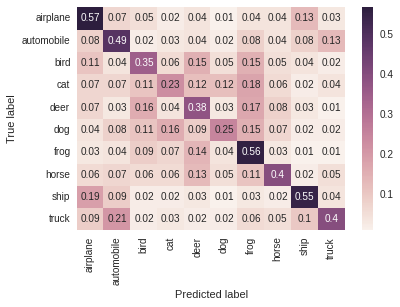

In [33]:
label_names = model.classes_
cm = confusion_matrix(y_test, y_predicted)
cm_norm = np.round(cm.astype('float') / cm.sum(axis=1)[:, np.newaxis], 2)
sns.heatmap(cm_norm,  annot=True,  fmt='', xticklabels=label_names, yticklabels=label_names);
print(accuracy_score(y_test, y_predicted))
plt.ylabel('True label')
plt.xlabel('Predicted label')
#print(roc_auc_score(y_test, y_predicted))

0.480733333333


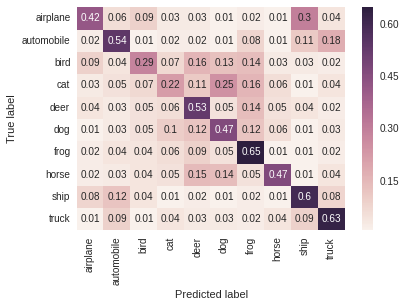

In [68]:
model=GaussianNB().fit(X_train_simp, y_train)
y_predicted=model.predict(X_test_simp)
label_names = model.classes_
cm = confusion_matrix(y_test, y_predicted)
cm = np.round(cm.astype('float') / cm.sum(axis=1)[:, np.newaxis], 2)
sns.heatmap(cm, annot=True,fmt='', xticklabels=label_names, yticklabels=label_names);
print(accuracy_score(y_test, y_predicted))
plt.ylabel('True label')
plt.xlabel('Predicted label')

In [69]:
cm

array([[ 0.42,  0.06,  0.09,  0.03,  0.03,  0.01,  0.02,  0.01,  0.3 ,
         0.04],
       [ 0.02,  0.54,  0.01,  0.02,  0.02,  0.01,  0.08,  0.01,  0.11,
         0.18],
       [ 0.09,  0.04,  0.29,  0.07,  0.16,  0.13,  0.14,  0.03,  0.03,
         0.02],
       [ 0.03,  0.05,  0.07,  0.22,  0.11,  0.25,  0.16,  0.06,  0.01,
         0.04],
       [ 0.04,  0.03,  0.05,  0.06,  0.53,  0.05,  0.14,  0.05,  0.04,
         0.02],
       [ 0.01,  0.03,  0.05,  0.1 ,  0.12,  0.47,  0.12,  0.06,  0.01,
         0.03],
       [ 0.02,  0.04,  0.04,  0.06,  0.09,  0.05,  0.65,  0.01,  0.01,
         0.02],
       [ 0.02,  0.03,  0.04,  0.05,  0.15,  0.14,  0.05,  0.47,  0.01,
         0.04],
       [ 0.08,  0.12,  0.04,  0.01,  0.02,  0.01,  0.02,  0.01,  0.6 ,
         0.08],
       [ 0.01,  0.09,  0.01,  0.04,  0.03,  0.03,  0.02,  0.04,  0.09,
         0.63]])

In [75]:
def confusion_matrix_as_dict(confusion_matrix,labels):
    cm_dict={}
    cm_dict['labels'] = list(labels)
    cm_dict['values']=confusion_matrix.tolist()
    return cm_dict


In [76]:
cm

array([[ 0.42,  0.06,  0.09,  0.03,  0.03,  0.01,  0.02,  0.01,  0.3 ,
         0.04],
       [ 0.02,  0.54,  0.01,  0.02,  0.02,  0.01,  0.08,  0.01,  0.11,
         0.18],
       [ 0.09,  0.04,  0.29,  0.07,  0.16,  0.13,  0.14,  0.03,  0.03,
         0.02],
       [ 0.03,  0.05,  0.07,  0.22,  0.11,  0.25,  0.16,  0.06,  0.01,
         0.04],
       [ 0.04,  0.03,  0.05,  0.06,  0.53,  0.05,  0.14,  0.05,  0.04,
         0.02],
       [ 0.01,  0.03,  0.05,  0.1 ,  0.12,  0.47,  0.12,  0.06,  0.01,
         0.03],
       [ 0.02,  0.04,  0.04,  0.06,  0.09,  0.05,  0.65,  0.01,  0.01,
         0.02],
       [ 0.02,  0.03,  0.04,  0.05,  0.15,  0.14,  0.05,  0.47,  0.01,
         0.04],
       [ 0.08,  0.12,  0.04,  0.01,  0.02,  0.01,  0.02,  0.01,  0.6 ,
         0.08],
       [ 0.01,  0.09,  0.01,  0.04,  0.03,  0.03,  0.02,  0.04,  0.09,
         0.63]])

In [77]:
json.dumps(confusion_matrix_as_dict(cm,label_names))


'{"labels": ["airplane", "automobile", "bird", "cat", "deer", "dog", "frog", "horse", "ship", "truck"], "values": [[0.42, 0.06, 0.09, 0.03, 0.03, 0.01, 0.02, 0.01, 0.3, 0.04], [0.02, 0.54, 0.01, 0.02, 0.02, 0.01, 0.08, 0.01, 0.11, 0.18], [0.09, 0.04, 0.29, 0.07, 0.16, 0.13, 0.14, 0.03, 0.03, 0.02], [0.03, 0.05, 0.07, 0.22, 0.11, 0.25, 0.16, 0.06, 0.01, 0.04], [0.04, 0.03, 0.05, 0.06, 0.53, 0.05, 0.14, 0.05, 0.04, 0.02], [0.01, 0.03, 0.05, 0.1, 0.12, 0.47, 0.12, 0.06, 0.01, 0.03], [0.02, 0.04, 0.04, 0.06, 0.09, 0.05, 0.65, 0.01, 0.01, 0.02], [0.02, 0.03, 0.04, 0.05, 0.15, 0.14, 0.05, 0.47, 0.01, 0.04], [0.08, 0.12, 0.04, 0.01, 0.02, 0.01, 0.02, 0.01, 0.6, 0.08], [0.01, 0.09, 0.01, 0.04, 0.03, 0.03, 0.02, 0.04, 0.09, 0.63]]}'

0.405866666667


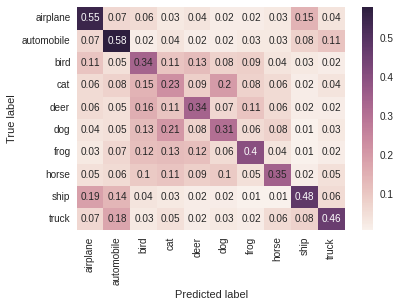

In [42]:
model=RandomForestClassifier().fit(X_train_simp, y_train)
y_predicted=model.predict(X_test_simp)
label_names = model.classes_
cm = confusion_matrix(y_test, y_predicted)
cm = np.round(cm.astype('float') / cm.sum(axis=1)[:, np.newaxis], 2)
sns.heatmap(cm, annot=True,  fmt='', xticklabels=label_names, yticklabels=label_names);
print(accuracy_score(y_test, y_predicted))
plt.ylabel('True label')
plt.xlabel('Predicted label')

0.2096


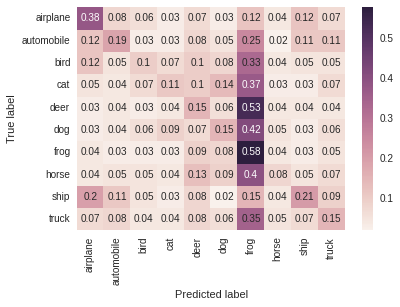

In [47]:
model=BernoulliNB().fit(X_train_simp, y_train)
y_predicted=model.predict(X_test_simp)
label_names = model.classes_
cm = confusion_matrix(y_test, y_predicted)
cm = np.round(cm.astype('float') / cm.sum(axis=1)[:, np.newaxis], 2)

sns.heatmap(cm, annot=True,  fmt='', xticklabels=label_names, yticklabels=label_names);
print(accuracy_score(y_test, y_predicted))
plt.ylabel('True label')
plt.xlabel('Predicted label')

0.105533333333


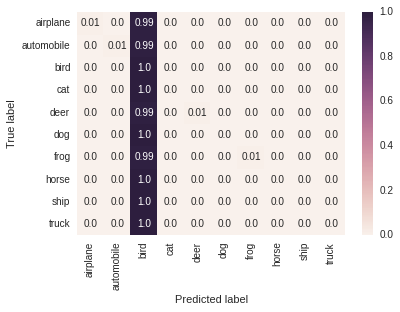

In [44]:
model=SVC().fit(X_train_simp, y_train)
y_predicted=model.predict(X_test_simp)
label_names = model.classes_
cm = confusion_matrix(y_test, y_predicted)
cm = np.round(cm.astype('float') / cm.sum(axis=1)[:, np.newaxis], 2)
sns.heatmap(cm, annot=True,  fmt='', xticklabels=label_names, yticklabels=label_names);
print(accuracy_score(y_test, y_predicted))
plt.ylabel('True label')
plt.xlabel('Predicted label')

In [46]:
ls

bag_of_words.ipynb                         practice.ipynb
exploration.ipynb                          real_model.ipynb
helper.py                                  Untitled1.ipynb
helper.pyc                                 Untitled2.ipynb
image_classifier_kevin.ipynb               Untitled3.ipynb
model.ipynb                                Untitled.ipynb
ocr_for_characters.ipynb                   Xtest.pkl
OCR for Street View Text - Research.ipynb  Xtrain.pkl
pair.ipynb
